In [37]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [38]:
(train_image,train_labels),(test_image,test_labels)= fashion_mnist.load_data()

In [39]:
train_image.shape

(60000, 28, 28)

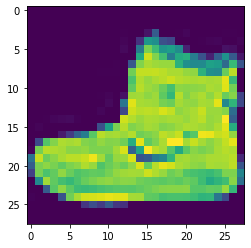

In [40]:
plt.imshow(train_image[0])

In [41]:
#limpieza de datos
train_images = train_image.astype('float32') / 255
test_images = test_image.astype('float32') / 255

In [42]:
train_images = train_image.reshape(train_image.shape[0],28,28,1)
test_images = test_image.reshape(test_image.shape[0],28,28,1)

In [43]:
train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)

In [50]:
#modelo
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 32)         

In [51]:
#compilar y entrenar 
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [56]:
model.fit(train_images,train_labels,batch_size=64,epochs=10)

Epoch 1/10
938/938 [==============================] - 27s 29ms/step - loss: 0.4365 - accuracy: 0.8467
Epoch 2/10
938/938 [==============================] - 28s 30ms/step - loss: 0.4401 - accuracy: 0.8443
Epoch 3/10
938/938 [==============================] - 26s 28ms/step - loss: 0.4459 - accuracy: 0.8419
Epoch 4/10
938/938 [==============================] - 28s 30ms/step - loss: 0.4491 - accuracy: 0.8425
Epoch 5/10
938/938 [==============================] - 28s 30ms/step - loss: 0.4508 - accuracy: 0.8433
Epoch 6/10
938/938 [==============================] - 27s 29ms/step - loss: 0.4496 - accuracy: 0.8418
Epoch 7/10
938/938 [==============================] - 28s 30ms/step - loss: 0.4877 - accuracy: 0.8368
Epoch 8/10
938/938 [==============================] - 28s 30ms/step - loss: 0.4653 - accuracy: 0.8398
Epoch 9/10
938/938 [==============================] - 27s 29ms/step - loss: 0.4838 - accuracy: 0.8400
Epoch 10/10
938/938 [==============================] - 28s 30ms/step - loss: 0.466

In [53]:
model.evaluate(test_image,test_labels,verbose=0)

[0.5026995539665222, 0.8554999828338623]

<h1>Consejo para manejo de imagenes</h1>
una imagen no es mas que una composicion de pixeles estos tinen un rago numerico de 0 a 255, 0 de negro y 255 blanco, y todos los numeros entre estos 2 seran la escala de grises, que es lo que interpreta la maquina?, una matriz.

la mayoria de imagenes son a color y estas tienen una complejidad extra, donde tendra 3 canales mas RGB y este hara que el proceso para la maquina sera aun mayor, asi que cuando el color no sea importante serea mejor trabajar con una escala de grises.

siempre mantener escalas y dimensiones definidas.

usar data augmentation, es usar diferentes puntos de una imagen de otra manera distinta de una misma foto.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage import io

In [4]:
im = io.imread('../../../../Downloads/perrito.jpeg')
im

array([[[39, 42, 11],
        [37, 40,  9],
        [37, 40,  9],
        ...,
        [36, 28,  7],
        [37, 29,  8],
        [33, 25,  4]],

       [[40, 43, 12],
        [36, 39,  8],
        [35, 38,  7],
        ...,
        [37, 29,  8],
        [37, 29,  8],
        [35, 27,  6]],

       [[40, 43, 14],
        [38, 41, 12],
        [37, 40, 11],
        ...,
        [35, 27,  6],
        [36, 28,  7],
        [35, 27,  6]],

       ...,

       [[61, 93, 46],
        [59, 88, 40],
        [62, 92, 40],
        ...,
        [43, 58,  0],
        [42, 57,  0],
        [45, 60,  1]],

       [[67, 96, 52],
        [61, 90, 44],
        [61, 89, 40],
        ...,
        [42, 56,  0],
        [43, 57,  0],
        [47, 61,  2]],

       [[62, 91, 47],
        [64, 91, 46],
        [69, 97, 48],
        ...,
        [43, 57,  0],
        [44, 58,  0],
        [46, 60,  1]]], dtype=uint8)

In [5]:
im.shape

(1080, 1920, 3)

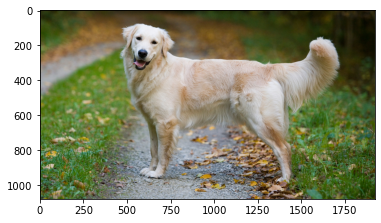

In [6]:
plt.imshow(im)

In [9]:
#separando canales de color 
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

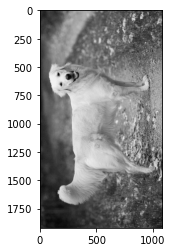

In [21]:
plt.imshow(r.T,cmap='gray')

In [22]:
r.shape

(1080, 1920)

In [35]:
#rgb con un unico canal activo
aux_dim = np.zeros([1080,1920])

red = np.dstack((r, aux_dim, aux_dim)).astype(np.uint8)
green = np.dstack((aux_dim, g, aux_dim)).astype(np.uint8)
blue = np.dstack((aux_dim, aux_dim, b)).astype(np.uint8)


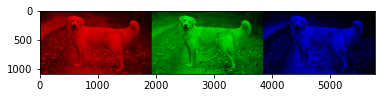

In [36]:
all_channels = np.concatenate((red,green,blue), axis=1)
plt.imshow(all_channels)

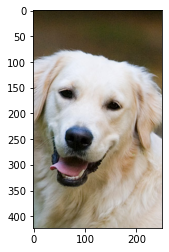

In [52]:
plt.imshow(im[0:423,500:750])

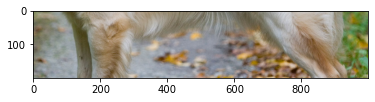

In [54]:
plt.imshow(im[600:800,500:1500])

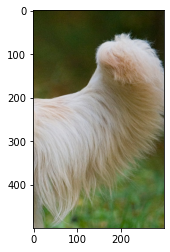

In [56]:
plt.imshow(im[100:600,1400:1700])

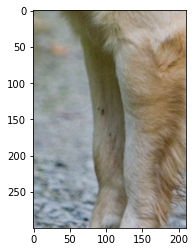

In [58]:
plt.imshow(im[600:900,550:760])

<h1>kernel</h1>
el kernel es simplemente una matriz, que se desliza desde la esquina superior izquierda hasta la esquina inferior derecha, paso por paso, hasta terminar toda la imagen, haciendo una operacion matematica llamada convolucion.

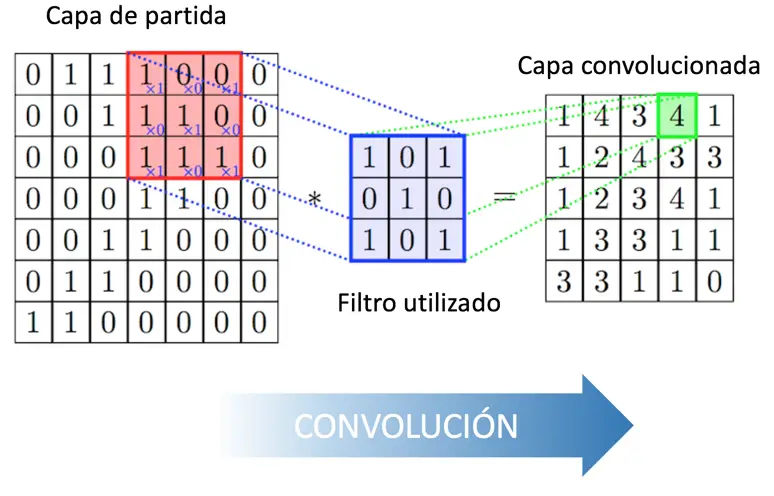

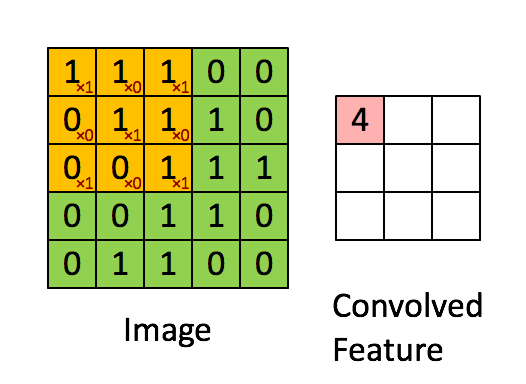

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.ndimage as nd 
from skimage import io,color

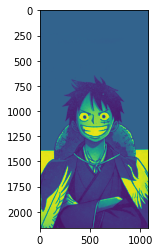

In [5]:
img = io.imread('../../../../Downloads/luffy-nawpic-21.jpeg')
img = color.rgb2gray(img)
plt.imshow(img)

In [47]:
#creacion del kernel 
kernel = np.array([[1,0,1],
                  [0,1,0],
                  [1,0,1]])


In [48]:
img_new = nd.convolve(img,kernel)

(-0.5, 1079.5, 2159.5, -0.5)

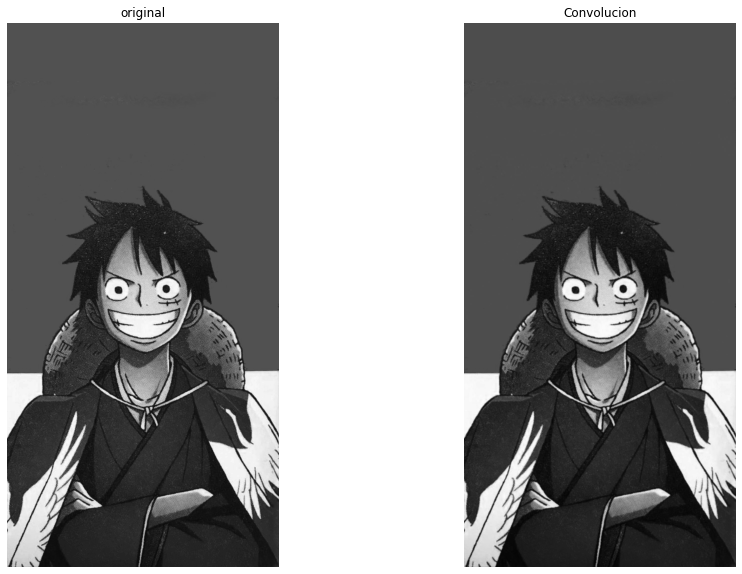

In [49]:
fig,axes = plt.subplots(1,2, figsize=(15,10))
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].set_title('original')
axes[0].axis('off')

axes[1].imshow(img_new, cmap=plt.cm.gray)
axes[1].set_title('Convolucion')
axes[1].axis('off')

<h1>padding y strides</h1>

<b>Padding </b> : 
vamos agregar en la capa exterior una capa de 0 en una n cantidad de veces.
<img src='https://upload.wikimedia.org/wikipedia/commons/9/92/Convolution_arithmetic_-_Padding_strides_transposed.gif' />
<b>strides</b> :
<img src='https://miro.medium.com/max/1400/1*4wZt9G7W7CchZO-5rVxl5g@2x.gif' />

<h1>Pooling</h1>

a medida de que agregamos mas filtros cada capa hacen una red compleja con muchos parametros, la capa de pooling esta hecha para reducir un poco la complejidad de la red neuronal, en esta capa no obtendremos el valor por valor si no el maximo o el promedio.

<img src='https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif' />

parametros = filtros * tamano kernel * profundidad de la capa anterior + filtros * (Bias)

<li>reduce en imagen la linea alrededor</li>
<li>reduce el ruido</li>
<li>comunmente se usa el parametro MAX</li>



<h1>Arquitectura</h1>

<b>CNN</b>
<img src='https://static.platzi.com/media/user_upload/Sin%20t%C3%ADtulo-f1fa127b-0d15-4d7c-ba3e-a6b1d34b6a8b.jpg' />

para calcular las dimensiones de la red luego de aplicar la convolucion se usa la siguiente formula 
<img src='https://static.platzi.com/media/user_upload/cnn-ecd384a2-d3c4-4975-84ff-74bfca495962.jpg' />

por ej : 
Si tenemos una imagen con medidas iniciales de 28x28x1 que tiene un filtro de 3x3, un padding "same", stride 1 y 6, los canales de salida se tienen lo siguiente :
n eje x = (28x2(1)-3)/1 + 1 = 28<br>
n eje y = (28x2(1)-3)/1 + 1 = 28

siendo las dimensiones de salida 28x28x16

<b>CNN Convolucion : </b> hace aplicar filtros a mi imagen de entrada(input), scan caracteristica sacando el kernel, aumenta la profundidad de la imagen, cada convolucion aumenta la profundidad de mi input, tambien puede reducirel ancho y largo de la imagen siempre y cuando el padding no sea aplicado.

<b>CNN max pooling :</b> reducir el anchio y largo de mi input, cuando aplico estas 2 capas juntas.

<img src='https://www.researchgate.net/publication/331540139/figure/fig4/AS:733273504354306@1551837435967/The-overall-architecture-of-the-Convolutional-Neural-Network-CNN-includes-an-input.png' />

<b>flatten :</b> aplana la matrix, lo que hace es llevar todo el arreglo a una sola dimension, aplana el tensor sin perder la informacion.

<img src='./cnn.png' />

<h1>Resolviendo problema de clasificacion</h1>


In [4]:
from tensorflow import keras 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation
from tensorflow.keras.datasets import cifar10

import numpy as np 
import matplotlib.pyplot as plt


In [5]:
(x_train,x_test),(y_train,y_test) = cifar10.load_data()

Exception: URL fetch failure on https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz: None -- [Errno 8] nodename nor servname provided, or not known

In [6]:
x_train.shape

NameError: name 'x_train' is not defined

In [7]:
plt.imshow(x_train[5])

NameError: name 'x_train' is not defined

<h1>Limpieza</h1>


In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
num_clases = len(np.unique(y_train)) # 10 posibles valores unicos
y_train = to_categorical(y_train,num_clases)
y_test = to_categorical(y_test,num_clases)

In [ ]:
(x_train,x_valid) = x_train[5000:],x_train[:5000]
(y_train,y_valid) = y_train[5000:],y_train[:5000]

print('x_train shape ', x_train.shape)
print('train ', x_train[0])
print('valid', x_valid[0])
print('test', x_test[0])